# Box-plot

To visualize n-dimensional data using a box plot, you would typically need to reduce the dimensionality of the data to a single variable or a set of variables that can be represented by box plots. Box plots provide a concise summary of the distribution of a dataset, including information about the median, quartiles, and outliers.

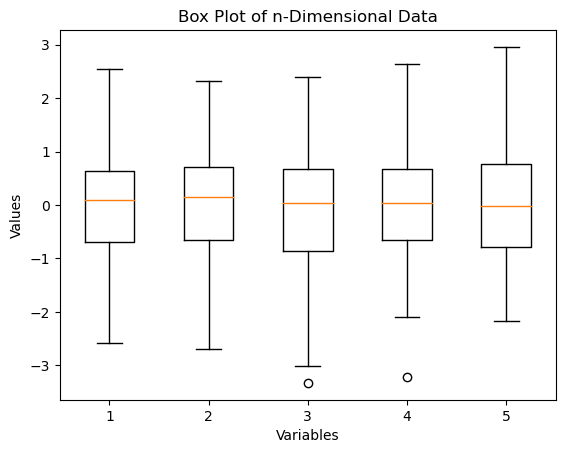

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample n-dimensional data
data = np.random.randn(100, 5)  

# Create a box plot
plt.boxplot(data)

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot of n-Dimensional Data')

# Show the plot
plt.show()

# Alpha-beta pruning

In [5]:
class Node:
    def __init__(self,value):
        self.value = value
        self.children = []
        self.alpha = float('-inf')
        self.beta = float('inf')
        
    def add_child(self, child_node):
        return self.children.append(child_node)
    def is_leaf(self):
        return not self.children
    
def alphabetapruning(node,depth,alpha,beta,maximizing_player):
    if depth==0 or node.is_leaf():
        return node.value
    if maximizing_player:
        max_val = float('-inf')
        best_child = None
        
        for child in node.children:
            child_value = alphabetapruning(child,depth-1,alpha,beta,False)
            if child_value>max_val:
                max_val = child_value
                best_child  = child
                
            alpha = max(alpha,max_val)
            if alpha>=beta:
                break
                
            node.alpha = max_val
            if node.alpha>node.beta:
                pruned_nodes.append(node)
                
        return max_val
    else:
        min_val = float('inf')
        best_child = None
        
        for child in node.children:
            child_value = alphabetapruning(child,depth-1,alpha,beta,True)
            if child_value<min_val:
                min_val = child_value
                best_child  = child
                
            beta = min(beta,min_val)
            if alpha>=beta:
                break
                
            node.beta = min_val
            if node.alpha>node.beta:
                pruned_nodes.append(node)
                
        return min_val
    
root = Node(0)
node_b = Node(3)
node_c = Node(-3)
node_d = Node(2)
node_e = Node(1)
node_f = Node(-2)
node_g = Node(5)
node_h = Node(-5)


root.add_child(node_b)
root.add_child(node_c)
node_b.add_child(node_d)
node_b.add_child(node_e)
node_b.add_child(node_f)
node_d.add_child(node_g)
node_d.add_child(node_h)

pruned_nodes = []
maximizing_player = True

optimalvalue = alphabetapruning(root,5,float('-inf'), float('inf'),maximizing_player)

print("Optimal value: ", optimalvalue)
path = [root]
current_node = root
while current_node.children:
    if maximizing_player:
        current_node = max(current_node.children,key=lambda x:x.alpha)
        maximizing_player = False
    else:
        current_node = min(current_node.children,key=lambda x:x.beta)
        maximizing_player = True
    path.append(current_node)
    
print("Solution path:")
for node in path:
    print(node.value)
if pruned_nodes:
    print("Pruned nodes: ")
    for node in pruned_nodes:
        print(node.value)
else:
    print("No pruned nodes")
        

Optimal value:  -2
Solution path:
0
3
2
5
No pruned nodes
